In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)

In [7]:
data = pd.read_csv('train.csv')
data.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,1513.75,87384.33,641.39,27.52,16.55,41.83,28.31,9.21,4.11,13.32,38.78,53.60,5.85,11.82,5.31,92.95,1.73,0.33,0.20,0.03,0.83,3.94,3.03,22.24,19.27,0.42,25.35,8.06,8.11,38.55,39.88,42.75,55.16,65.17,75.98,76.75,76.45,73.67,59.73,45.18,37.43,31.67,33.83,42.35,57.72,67.35,75.92,74.28,79.59,70.84,62.39,41.89,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.40,8.11,19.51,28028.04,76.71,1113.35,92026.84,638.60,29.37,10.93,35.26,35.33,12.46,6.04,18.49,36.35,52.51,7.45,9.19,5.21,88.75,6.44,0.

In [9]:
data.shape

(13173, 152)

In [11]:
data['patient_zip3'].isna().sum()

0

In [13]:
# how many zip3 areas are represented?
data['patient_zip3'].nunique()

751

In [15]:
# how many states are represented? 
data['patient_state'].nunique()

44

In [17]:
# states with zipcodes that start with 0
zip0 = ['CT', 'MA', 'ME', 'NH', 'NJ', 'PR', 'RI', 'VT', 'VI', 'AE']

# previously, in WiDS datathon challenge 1, these states had incorrect zip3 info because pandas read the zip3 column as 'int'
# this time it's also reading the zip3 column as 'int'
# check how many rows of these states we have 
sub0 = data[data['patient_state'].isin(zip0)]
sub0.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period


/Users/chonkcheto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='metastatic_diagnosis_period', ylabel='Count'>

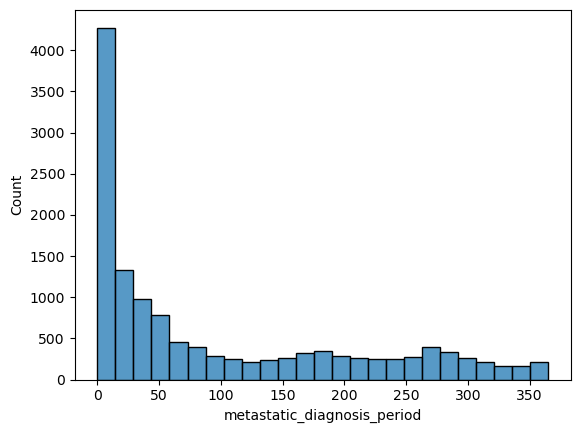

In [19]:
# let's look at the distribution of the target: metastatic diagnosis period 

sns.histplot(data=data, x='metastatic_diagnosis_period')

/Users/chonkcheto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='metastatic_diagnosis_period', ylabel='Proportion'>

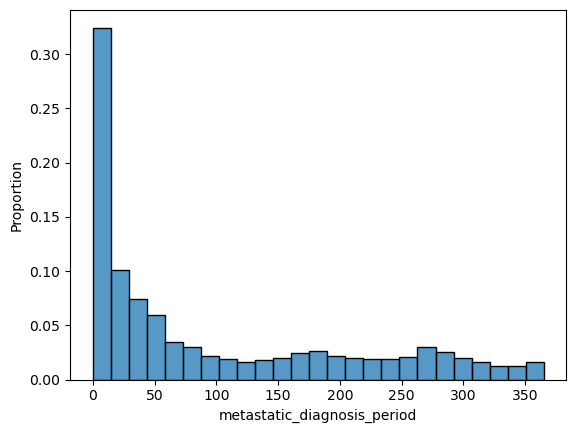

In [21]:
sns.histplot(data=data, x='metastatic_diagnosis_period', stat='proportion')

In [ ]:
# for about 1/3 of people, 0 days between diagnosis of triple-negative breast cancer and diagnosis of metastasis 
# speculation: delayed in getting medical care 

# there's a lot of ICD-9 and ICD-10 codes

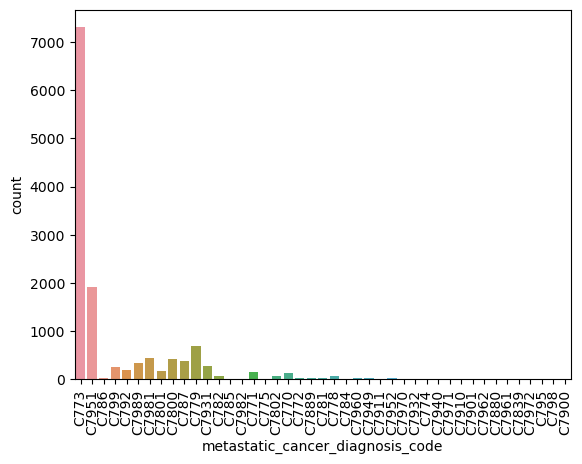

In [60]:
# how many different diagnosis codes for metastatic breast cancer do we have? 
ax = sns.countplot(data=data, x='metastatic_cancer_diagnosis_code')
plt.xticks(rotation=90);

In [62]:
data['metastatic_cancer_diagnosis_code'].nunique()

43

In [66]:
data.groupby('metastatic_cancer_diagnosis_code')['patient_id'].count().sort_values(ascending=False)

metastatic_cancer_diagnosis_code
C773     7308
C7951    1922
C779      700
C7981     453
C7800     422
C787      372
C7989     330
C7931     277
C799      259
C792      187
C7801     171
C771      145
C770      140
C782       78
C7802      75
C778       73
C786       35
C7952      30
C772       29
C781       26
C7949      24
C7889      21
C7960      19
C785       11
C7982       8
C7932       8
C784        6
C775        6
C7961       6
C7970       5
C7971       5
C774        3
C7940       3
C7972       3
C798        2
C7901       2
C795        2
C7911       2
C7962       1
C7910       1
C7900       1
C7880       1
C7839       1
Name: patient_id, dtype: int64

In [ ]:
# for the metastatic_cancer_diagnosis_code

# over half of patients have ICD-10 code C773: 
# "Secondary and unspecified malignant neoplasm of axilla and upper limb lymph nodes" 

# the next largest diagnosis group is ICD-10 code C7951: 
# "Secondary malignant neoplasm of bone"

# could be a factor for how fast/late the metastasis is caught/diagnosed 
# wouldn't be able to know if it's because these are slower-burning ones, so it takes time for the metastasis to be a problem 
# or because the patient is more responsive to treatment so the metastasis is delayed compared to non-responsive patients

In [78]:
# let's look at how many different types of breast cancer diagnosis codes are represented here 

data['breast_cancer_diagnosis_code'].nunique()

47

In [86]:
# are any of these overlapping? 
# can we make these all ICD-10 codes? 
# let's look at how many people have which codes first 

data.groupby('breast_cancer_diagnosis_code')['patient_id'].count().sort_values(ascending=False)

breast_cancer_diagnosis_code
1749      1947
C50912    1834
C50911    1803
C50919    1504
C50411     927
C50412     907
C50812     524
C50811     479
1744       402
1748       337
C50212     292
C50211     249
C50512     225
C50511     220
C50112     207
C50111     197
C50311     160
C50312     139
1742       110
C50012     104
C50011      90
1741        86
1745        81
C50819      53
1743        45
C50419      45
C50611      37
C50612      34
C5091       31
C50219      12
C50119      12
19881       12
C50019      11
C50319      10
1746         9
C50519       8
C5081        8
C5041        5
C509         4
C5031        4
C5011        3
C5001        1
C50619       1
C50221       1
C50421       1
C50122       1
C50922       1
Name: patient_id, dtype: int64

In [88]:
# make mask to change the ICD-9 to ICD-10
# this might be problematic with the ML test set if an entry has an ICD-9 or ICD-10 code that isn't in the training dataset
# will need to set a default -- can we ignore? 

icd10 = data['breast_cancer_diagnosis_code'].str.contains('C')
icd10.head()

0     True
1     True
2    False
3     True
4    False
Name: breast_cancer_diagnosis_code, dtype: bool

In [91]:
data['breast_cancer_diagnosis_desc'].nunique() # these seem to match the number of ICD9/10 codes 

47

In [ ]:
# maybe we can just use the description?
# let's see if they're close enough for one of the ICD-9 & ICD-10 pairs:
# ICD-9 174.9 converts approximately to ICD-10 C50.919
# ICD-9: Malignant neoplasm of breast (female), unspecified
# ICD-10: Malignant neoplasm of unspecified site of unspecified female breast 
# can hard code the conversion for all of ICD-9 
# 

In [93]:
data[data['breast_cancer_diagnosis_code']=='C50922']

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
1908,141903,Other,MEDICAID,FL,330,South,South Atlantic,66,F,24.0,C50922,Malignant neoplasm of unspecified site of left...,C7981,NaN,NaN,34958.92,1716.93,43.38,10.63,11.39,11.2,12.53,13.45,14.94,12.92,8.02,4.93,49.48,50.52,46.28,15.78,31.88,6.06,3.28,52.59,66478.65,3.36,2.97,3.89,3.8,4.21,9.09,12.71,17.46,13.49,14.56,14.46,29.02,32875.39,62.05,12264.35,350955.9,1563.18,39.9,13.2,29.02,27.58,19.0,11.21,30.21,44.04,63.13,5.62,18.44,0.24,61.12,18.48,2.16,0.25,0.04,4.22,13.72,42.83,11.25,13.47,14.07,29.67,15.44,5.09,72.24,70.32,66.11,76.44,77.46,81.71,81.51,83.04,81.78,79.3,76.09,74.17,66.71,73.02,71.88,75.84,79.27,80.47,83.13,84.23,81.99,78.63,71.27,69.76,69.54,66.34,75.57,79.23,79.44,82.49,84.14,84.12,83.02,80.27,78.72,76.81,66.55,66.44,74.73,76.01,79.11,83.07,84.45,83.78,82.71,79.13,73.39,75.0,69.36,71.83,71.43,76.16,79.82,82.16,84.11,83.82,82.94,78.66,74.56,69.57,65.66,74.56,69.43,76.01,78.16,82.28,83.48,83.44,82.73,80.93,75.81,70.69,58


In [95]:
data['patient_gender'].unique() # everyone is female, but there is one diagnosis that is of male breast 

array(['F'], dtype=object)

In [68]:
data.groupby('patient_race')['patient_id'].count()

patient_race
Asian        373
Black       1159
Hispanic     807
Other        612
White       3565
Name: patient_id, dtype: int64

In [70]:
data['patient_race'].isna().sum()

6657

In [72]:
# almost half of the data doesn't include race 
# instead of imputing with "other" let's impute with "unknown"

data['patient_race'] = data['patient_race'].fillna('Unknown')

In [74]:
data.groupby('patient_race')['patient_id'].count() 

patient_race
Asian        373
Black       1159
Hispanic     807
Other        612
Unknown     6657
White       3565
Name: patient_id, dtype: int64

In [ ]:
# I would rather this than try to impute based on their ZIP3 demographic data 

# this is essentially a regression problem 
# linear regression 
# K-neighbors 
# random forest 